## Laboratorino No.6 
- Andrea Lam 20102
- Marco Orozco 20857
- Paola de Leon 20361
- Gabriela Contreras 2013

In [2]:
#Imports 
import numpy as np
import random as rand
import matplotlib.pyplot as plt

### Ejercicio No.1 

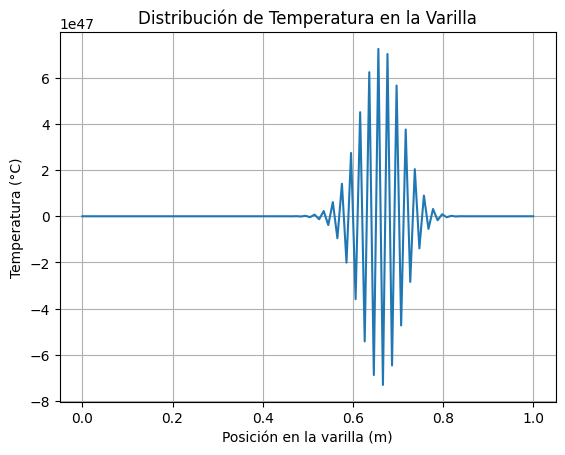

In [4]:


def temperatura_varilla_macroscopica(longitud, segmentos, conductividad_termica, temperatura_inicial, temperatura_extremo_izquierdo, temperatura_extremo_derecho, tiempo_simulacion):
    # Calcula la longitud de cada segmento
    longitud_segmento = longitud / segmentos

    # Inicializa un arreglo para almacenar la temperatura en cada segmento
    temperatura = np.full(segmentos, temperatura_inicial)

    # Inicializa el tiempo
    tiempo = 0

    while tiempo < tiempo_simulacion:
        # Calcula el gradiente de temperatura en cada segmento
        gradiente = np.diff(temperatura) / longitud_segmento

        # Calcula la tasa de flujo de calor en cada segmento
        flujo_calor = -conductividad_termica * gradiente

        # Actualiza la temperatura en cada segmento
        temperatura[1:-1] += flujo_calor[1:] * longitud_segmento / conductividad_termica

        # Aplica condiciones de contorno
        temperatura[0] = temperatura_extremo_izquierdo
        temperatura[-1] = temperatura_extremo_derecho

        # Incrementa el tiempo
        tiempo += 1

    return temperatura

# Parámetros de ejemplo
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_material = 0.01  # Conductividad térmica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 100  # Tiempo total de simulación en segundos

# Calcula la distribución de temperatura
temperaturas = temperatura_varilla_macroscopica(longitud_varilla, segmentos_varilla, conductividad_termica_material,
                                                temperatura_inicial_varilla, temperatura_extremo_izquierdo_varilla,
                                                temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla)

# Visualiza la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas)
plt.xlabel('Posición en la varilla (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperatura en la Varilla')
plt.grid(True)
plt.show()


C:\Users\andre\AppData\Local\Temp\ipykernel_9404\1319949615.py:13: RuntimeWarning: overflow encountered in divide
  gradiente = np.diff(temperatura) / longitud_segmento
C:\Users\andre\AppData\Local\Temp\ipykernel_9404\1319949615.py:19: RuntimeWarning: overflow encountered in divide
  temperatura[1:-1] += flujo_calor[1:] * tiempo_paso / (conductividad_termica * longitud_segmento**2)


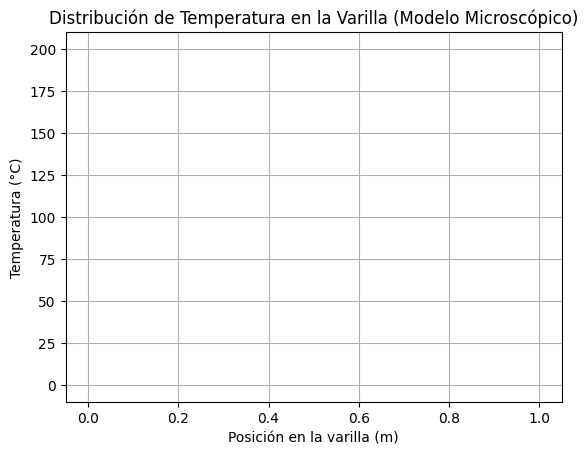

In [7]:

def temperatura_varilla_microscopica(longitud, segmentos, conductividad_termica, temperatura_inicial, temperatura_extremo_izquierdo, temperatura_extremo_derecho, tiempo_simulacion, tiempo_paso):
    # Calcula la longitud de cada segmento
    longitud_segmento = longitud / segmentos

    # Inicializa un arreglo para almacenar la temperatura en cada segmento
    temperatura = np.full(segmentos, temperatura_inicial)

    # Inicializa el tiempo
    tiempo = 0

    while tiempo < tiempo_simulacion:
        # Calcula el gradiente de temperatura en cada segmento
        gradiente = np.diff(temperatura) / longitud_segmento

        # Calcula la tasa de flujo de calor en cada segmento a nivel microscópico
        flujo_calor = -conductividad_termica * gradiente

        # Actualiza la temperatura en cada segmento a nivel microscópico
        temperatura[1:-1] += flujo_calor[1:] * tiempo_paso / (conductividad_termica * longitud_segmento**2)

        # Aplica condiciones de contorno
        temperatura[0] = temperatura_extremo_izquierdo
        temperatura[-1] = temperatura_extremo_derecho

        # Incrementa el tiempo
        tiempo += tiempo_paso

    return temperatura

# Parámetros de ejemplo
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_material = 0.01  # Conductividad térmica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 100  # Tiempo total de simulación en segundos
tiempo_paso_varilla = 0.1  # Paso de tiempo en segundos

# Calcula la distribución de temperatura a nivel microscópico
temperaturas_microscopicas = temperatura_varilla_microscopica(longitud_varilla, segmentos_varilla, conductividad_termica_material,
                                                temperatura_inicial_varilla, temperatura_extremo_izquierdo_varilla,
                                                temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla, tiempo_paso_varilla)

# Visualiza la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas_microscopicas)
plt.xlabel('Posición en la varilla (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperatura en la Varilla (Modelo Microscópico)')
plt.grid(True)
plt.show()


In [6]:

def modelo_multiescala_varilla(longitud, segmentos, conductividad_termica_macro, conductividad_termica_micro, temperatura_inicial, temperatura_extremo_izquierdo, temperatura_extremo_derecho, tiempo_simulacion, tiempo_paso):
    # Calcula la longitud de cada segmento
    longitud_segmento = longitud / segmentos

    # Inicializa un arreglo para almacenar la temperatura en cada segmento
    temperatura = np.full(segmentos, temperatura_inicial)

    # Inicializa el tiempo
    tiempo = 0

    while tiempo < tiempo_simulacion:
        # Calcula el gradiente de temperatura en cada segmento
        gradiente = np.diff(temperatura) / longitud_segmento

        # Calcula la tasa de flujo de calor en cada segmento a nivel macroscópico
        flujo_calor_macro = -conductividad_termica_macro * gradiente

        # Inicializa un arreglo para almacenar la temperatura a nivel microscópico
        temperatura_micro = temperatura.copy()

        # Realiza una simulación a nivel microscópico en cada segmento
        for i in range(segmentos):
            # Calcula el gradiente de temperatura a nivel microscópico
            gradiente_micro = np.diff(temperatura_micro) / longitud_segmento

            # Calcula la tasa de flujo de calor a nivel microscópico
            flujo_calor_micro = -conductividad_termica_micro * gradiente_micro

            # Actualiza la temperatura a nivel microscópico
            temperatura_micro[i+1] += flujo_calor_micro[i+1] * tiempo_paso / (conductividad_termica_micro * longitud_segmento**2)

        # Actualiza la temperatura a nivel macroscópico utilizando la temperatura a nivel microscópico
        temperatura[1:-1] += flujo_calor_macro[1:] * longitud_segmento / conductividad_termica_macro
        temperatura[1:-1] = temperatura_micro[1:-1]  # Actualiza la temperatura a nivel macroscópico con la temperatura a nivel microscópico

        # Aplica condiciones de contorno
        temperatura[0] = temperatura_extremo_izquierdo
        temperatura[-1] = temperatura_extremo_derecho

        # Incrementa el tiempo
        tiempo += tiempo_paso

    return temperatura

# Parámetros de ejemplo
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_macro = 0.01  # Conductividad térmica macroscópica del material en W/(m*K)
conductividad_termica_micro = 0.005  # Conductividad térmica microscópica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 100  # Tiempo total de simulación en segundos
tiempo_paso_varilla = 0.1  # Paso de tiempo en segundos

# Calcula la distribución de temperatura utilizando el modelo multiescala
temperaturas_multiescala = modelo_multiescala_varilla(longitud_varilla, segmentos_varilla, conductividad_termica_macro,
                                                      conductividad_termica_micro, temperatura_inicial_varilla,
                                                      temperatura_extremo_izquierdo_varilla,
                                                      temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla,
                                                      tiempo_paso_varilla)

# Visualiza la distribución de temperatura
plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas_multiescala)
plt.xlabel('Posición en la varilla (m)')
plt.ylabel('Temperatura (°C)')
plt.title('Distribución de Temperatura en la Varilla (Modelo Multiescala)')
plt.grid(True)
plt.show()


IndexError: index 99 is out of bounds for axis 0 with size 99

In [ ]:

# Parámetros de la simulación
longitud_varilla = 1.0  # Longitud de la varilla en metros
segmentos_varilla = 100  # Número de segmentos en la varilla
conductividad_termica_macro = 0.01  # Conductividad térmica macroscópica del material en W/(m*K)
conductividad_termica_micro = 0.005  # Conductividad térmica microscópica del material en W/(m*K)
temperatura_inicial_varilla = 100.0  # Temperatura inicial en grados Celsius
temperatura_extremo_izquierdo_varilla = 0.0  # Temperatura en el extremo izquierdo en grados Celsius
temperatura_extremo_derecho_varilla = 200.0  # Temperatura en el extremo derecho en grados Celsius
tiempo_simulacion_varilla = 1000  # Tiempo total de simulación en segundos
tiempo_paso_varilla = 1.0  # Paso de tiempo en segundos

# Simula la distribución de temperatura utilizando el modelo multiescala
temperaturas_multiescala = modelo_multiescala_varilla(longitud_varilla, segmentos_varilla, conductividad_termica_macro,
                                                      conductividad_termica_micro, temperatura_inicial_varilla,
                                                      temperatura_extremo_izquierdo_varilla,
                                                      temperatura_extremo_derecho_varilla, tiempo_simulacion_varilla,
                                                      tiempo_paso_varilla)

# Visualiza la distribución de temperatura a lo largo del tiempo
tiempos = np.arange(0, tiempo_simulacion_varilla, tiempo_paso_varilla)

# Crea una animación de la distribución de temperatura en la varilla
plt.figure()
for i in range(len(tiempos)):
    plt.clf()
    plt.plot(np.linspace(0, longitud_varilla, segmentos_varilla), temperaturas_multiescala[i])
    plt.xlabel('Posición en la varilla (m)')
    plt.ylabel('Temperatura (°C)')
    plt.title('Distribución de Temperatura en la Varilla\nTiempo: {} segundos'.format(tiempos[i]))
    plt.grid(True)
    plt.pause(0.01)

plt.show()


### Ejercicio No.2

### Inciso 1

In [28]:
# darcy
# Función que simula el flujo de Darcy en un medio poroso
def darcy_flow(L, A, k, P_left, P_right, dx, dt, total_time):
    
    # Número de puntos en la malla espacial y temporal
    Nx = int(L / dx) + 1
    Nt = int(total_time / dt) + 1

    # Inicializar la matriz de presión
    P = np.zeros((Nt, Nx))

    # Condiciones iniciales y de contorno
    P[:, 0] = P_left
    P[:, -1] = P_right

    # Simulación usando un esquema explícito en diferencias finitas
    for n in range(0, Nt - 1):
        for i in range(1, Nx - 1):
            # Calcular el gradiente de presión
            dP_dx = (P[n, i+1] - P[n, i-1]) / (2 * dx)
            
            # Calcular el caudal según la Ley de Darcy
            Q = -k * A * dP_dx
            
            # Actualizar la presión
            P[n + 1, i] = P[n, i] - (Q / A) * dt

    return P

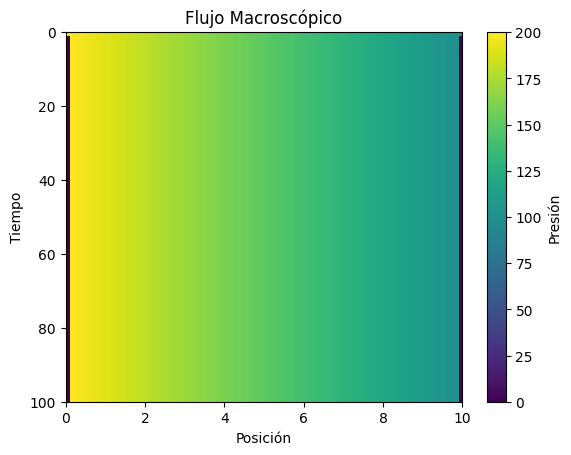

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros generales del problema
L = 10.0  # Longitud de la formación rocosa (m)
A = 1.0  # Área de sección transversal (m^2)
k = 1e-12  # Permeabilidad del medio (m^2)
P_left = 200e5  # Presión en el extremo izquierdo (Pa)
P_right = 100e5  # Presión en el extremo derecho (Pa)
dx = 0.1  # Tamaño del paso espacial (m)
dt = 1.0  # Tamaño del paso temporal (s)
total_time = 100.0  # Tiempo total de simulación (s)

# Crear una malla de posiciones
x = np.linspace(0, L, int(L / dx) + 1)

# Inicializar la matriz de presión con condiciones iniciales
P = np.zeros((int(total_time / dt) + 1, len(x)))
P[0, :] = P_left + (P_right - P_left) * x / L

# Ejecutar la simulación del flujo de agua utilizando la Ley de Darcy
for t in range(0, P.shape[0] - 1):
    for i in range(1, len(x) - 1):
        dP_dx = (P[t, i+1] - P[t, i-1]) / (2 * dx)
        Q = -k * A * dP_dx
        P[t + 1, i] = P[t, i] - (Q / A) * dt

# Visualización de los resultados
plt.imshow(P / 1e5, cmap='viridis', extent=[0, L, total_time, 0], aspect='auto')
plt.colorbar(label='Presión')
plt.xlabel('Posición')
plt.ylabel('Tiempo')
plt.title("Flujo Macroscópico")
plt.show()


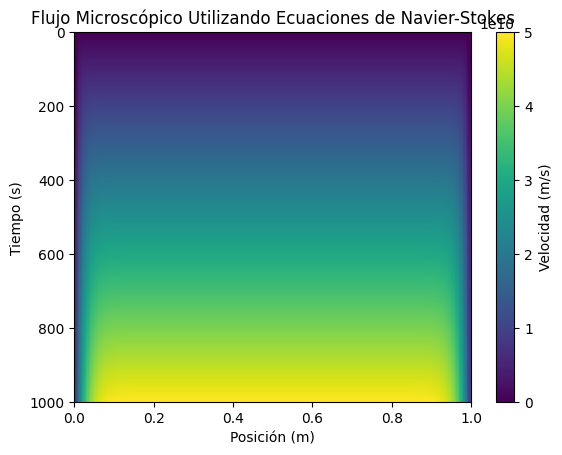

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import solve_banded

def simulate_microscopic_flow(length, viscosity_fluid, inlet_pressure, outlet_pressure, spatial_step, time_step, total_time):
    # numero de puntos en la malla espacial y temporal
    num_x_points = int(length / spatial_step) + 1
    num_time_steps = int(total_time / time_step) + 1

    # inicializar la matriz de velocidad
    velocity_field = np.zeros((num_time_steps, num_x_points))

    # condiciones iniciales (velocidad inicial en todo el dominio)
    velocity_field[0, :] = 0.0

    # coeficientes para el método implícito
    alpha = viscosity_fluid * time_step / (2 * spatial_step ** 2)
    beta = time_step / (2 * spatial_step)

    # preparar la matriz tridiagonal
    ab = np.zeros((3, num_x_points))
    ab[0, 1:] = -alpha  # Diagonal inferior
    ab[1, :] = 1 + 2 * alpha  # Diagonal principal
    ab[2, :-1] = -alpha  # Diagonal superior

    # bucle principal de la simulación
    for n in range(0, num_time_steps - 1):
        # crear el vector b del sistema Ax = b
        b = velocity_field[n, :]
        b[1:-1] += alpha * (velocity_field[n, :-2] - 2 * velocity_field[n, 1:-1] + velocity_field[n, 2:])
        b[1:-1] += beta * (inlet_pressure - outlet_pressure) / length

        # resolver el sistema lineal para encontrar la nueva velocidad
        velocity_field[n + 1, :] = solve_banded((1, 1), ab, b)

    return velocity_field

# parametros de simulación
length = 1.0
viscosity_fluid = 1e-6
spatial_step = 0.01
time_step = 0.1
total_time = 1000.0
inlet_pressure = 20e5
outlet_pressure = 10e5

# ver resultados
velocity_field = simulate_microscopic_flow(length, viscosity_fluid, inlet_pressure, outlet_pressure, spatial_step, time_step, total_time)
plt.imshow(velocity_field, extent=[0, length, total_time, 0], aspect='auto')
plt.colorbar(label='Velocidad (m/s)')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')
plt.title('Flujo Microscópico Utilizando Ecuaciones de Navier-Stokes')
plt.show()


### Inciso 3

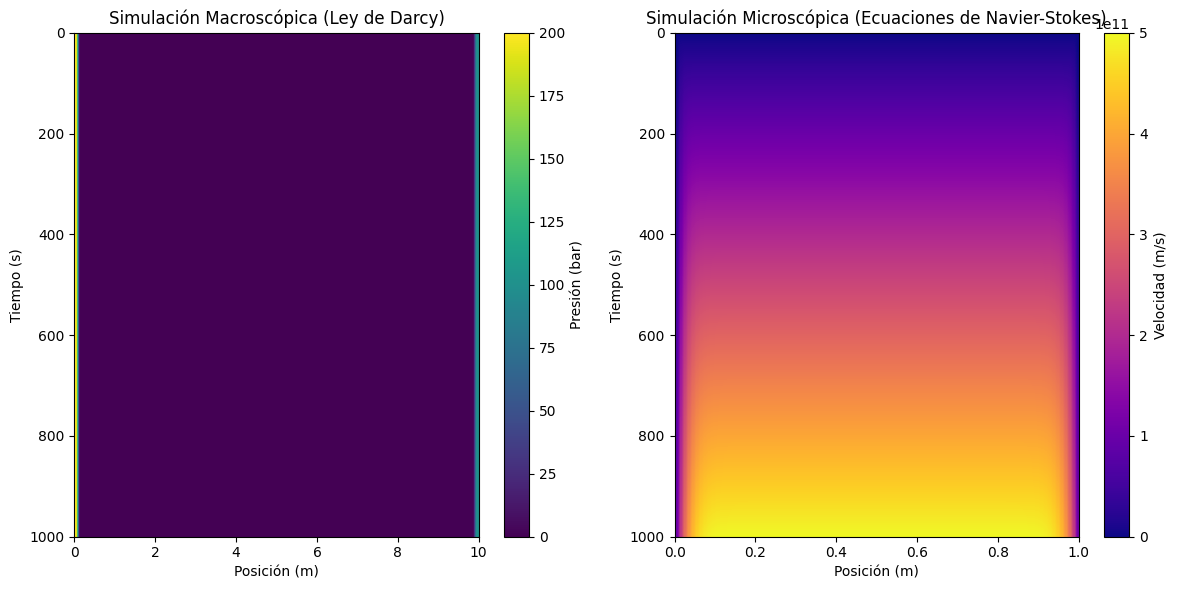

In [61]:
import numpy as np
import matplotlib.pyplot as plt

# Función para realizar la simulación multiescala concurrente
def multiscale_simulation(L_macro, A, k, P_left, P_right, dx_macro, dt_macro, total_time, L_micro, density_fluid, viscosity_fluid, dx_micro, dt_micro, total_time_micro):
    # Simulación macroscópica usando la Ley de Darcy
    P_macro = darcy_flow(L_macro, A, k, P_left, P_right, dx_macro, dt_macro, total_time)

    # Obtener la presión en el extremo derecho de la simulación macroscópica
    P_macro_right = P_macro[-1, -1]

    # Simulación microscópica usando las ecuaciones de Navier-Stokes
    velocity_field_micro = simulate_microscopic_flow(L_micro, viscosity_fluid, P_left, P_macro_right, dx_micro, dt_micro, total_time_micro)

    return P_macro, velocity_field_micro

# Parámetros de simulación macroscópica
L_macro = 10.0  # Longitud de la formación rocosa (m)
A = 1.0  # Área de sección transversal (m^2)
k = 1e-12  # Permeabilidad del medio (m^2)
P_left = 200e5  # Presión en el extremo izquierdo (Pa)
P_right = 100e5  # Presión en el extremo derecho (Pa)
dx_macro = 0.1  # Tamaño del paso espacial macroscópico (m)
dt_macro = 1.0  # Tamaño del paso temporal macroscópico (s)
total_time = 1000.0  # Tiempo total de simulación macroscópica (s)

# Parámetros de simulación microscópica
L_micro = 1.0  # Longitud del segmento en metros
density_fluid = 1000.0  # Densidad del fluido en kg/m^3
viscosity_fluid = 1e-6  # Viscosidad cinemática en m^2/s
dx_micro = 0.01  # Tamaño del paso espacial microscópico (m)
dt_micro = 0.1  # Tamaño del paso temporal microscópico (s)
total_time_micro = 1000.0  # Tiempo total de simulación microscópica (s)

# Realizar la simulación multiescala concurrente
P_macro, velocity_field_micro = multiscale_simulation(L_macro, A, k, P_left, P_right, dx_macro, dt_macro, total_time, L_micro, density_fluid, viscosity_fluid, dx_micro, dt_micro, total_time_micro)

# Visualización de resultados
plt.figure(figsize=(12, 6))

# Gráfico de la simulación macroscópica (presión)
plt.subplot(1, 2, 1)
plt.imshow(P_macro / 1e5, cmap='viridis', extent=[0, L_macro, total_time, 0], aspect='auto')
plt.colorbar(label='Presión (bar)')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')
plt.title("Simulación Macroscópica (Ley de Darcy)")

# Gráfico de la simulación microscópica (velocidad)
plt.subplot(1, 2, 2)
plt.imshow(velocity_field_micro, cmap='plasma', extent=[0, L_micro, total_time_micro, 0], aspect='auto')
plt.colorbar(label='Velocidad (m/s)')
plt.xlabel('Posición (m)')
plt.ylabel('Tiempo (s)')
plt.title("Simulación Microscópica (Ecuaciones de Navier-Stokes)")

plt.tight_layout()
plt.show()


#### Inciso 4

a. Multiescala concurrente: los modelos 

### Ejercicio No.3 

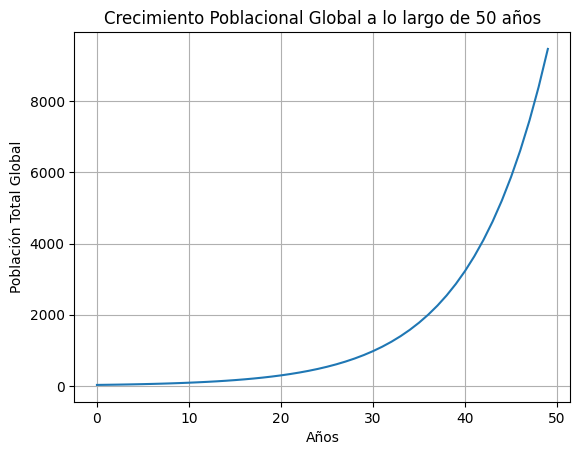

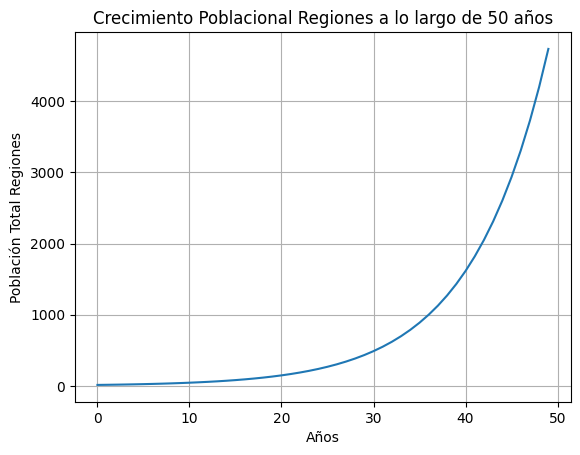

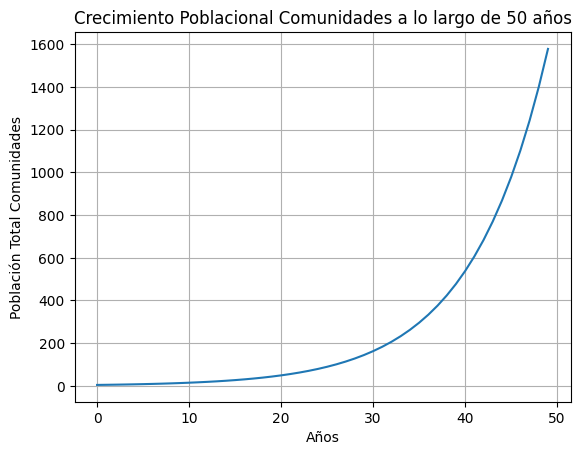

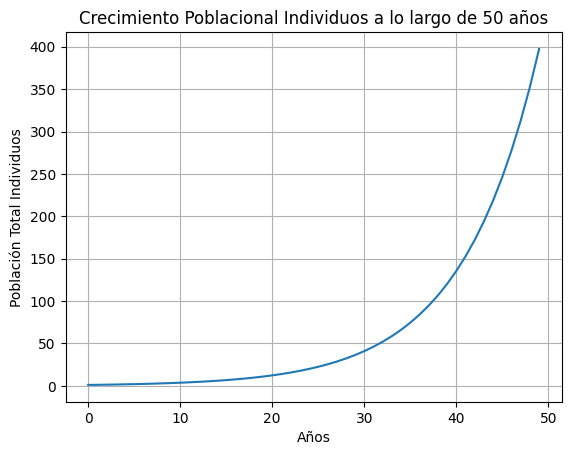

In [5]:
class Individuo:
    def __init__(self):
        self.poblacion = 1
        self.natalidad = 0.2
        self.migracion = 0.005
        self.mortalidad = 0.07
        self.sexo = self.get_sexo()
        self.poblacion_total_historica = []

    def get_sexo(self):
        aleatorio = rand.randint(1, 2)
        if aleatorio < 2:
            # Hombre
            return 1
        else:
            # Mujer
            return 2
        
    #Se solicito ayuda a chatgpt
    def crecimiento(self):
        nacimientos = self.poblacion * self.natalidad
        muertes = self.poblacion * self.mortalidad
        migracion = self.poblacion * self.migracion
        self.poblacion += nacimientos - muertes + migracion
        self.poblacion_total_historica.append(self.poblacion)
        return self.poblacion


class Comunidad:
    def __init__(self, no_individuos):
        self.recursos = 0.002
        self.poblacion_total_historica = []
        self.individuos = [Individuo() for _ in range(no_individuos)]

    def reproduccion(self):
        hombres = sum(1 for individuo in self.individuos if individuo.sexo == 1)
        mujeres = sum(1 for individuo in self.individuos if individuo.sexo == 2)

        if hombres >= 1 and mujeres >= 1:
            nacimientos = min(hombres, mujeres) * rand.randint(1, 3)
            for _ in range(nacimientos):
                self.individuos.append(Individuo())
                
     #Se solicito ayuda a chatgpt
    def crecimiento(self):
        competencia = sum(individuo.poblacion for individuo in self.individuos) * self.recursos
        
        for individuo in self.individuos:
            individuo.crecimiento() 
            individuo.poblacion -= competencia 

        self.poblacion_total_historica.append(sum(individuo.poblacion for individuo in self.individuos))

    def poblacion_total(self):
        return sum(individuo.poblacion for individuo in self.individuos)


class Region:
    def __init__(self, no_comunidades, no_individuos):
        self.cambioClimatico = 0.001
        self.poblacion_total_historica = []
        self.comunidades = [Comunidad(no_individuos) for _ in range(no_comunidades)]
        self.poblacionTotal = self.poblacion_total() 

    def crecimiento(self):
        CC = sum(comunidad.poblacion_total() for comunidad in self.comunidades) * self.cambioClimatico
        for comunidad in self.comunidades:
            comunidad.crecimiento()  
        self.poblacionTotal -= CC

        self.poblacion_total_historica.append(sum(comunidad.poblacion_total() for comunidad in self.comunidades))

    def poblacion_total(self):
        return sum(comunidad.poblacion_total() for comunidad in self.comunidades)

class Global:
    def __init__(self, no_region, no_comunidades, no_individuos):
        self.regiones = [Region(no_comunidades, no_individuos) for _ in range(no_region)]
        self.politica = 0.005
        self.enfermedades = 0.001
        self.poblacionTotal = self.poblacion_total()

        self.poblacion_total_historica = []  

    def crecimiento(self):
        enfermedad = sum(region.poblacion_total() for region in self.regiones) * self.enfermedades
        politics = sum(region.poblacion_total() for region in self.regiones) * self.politica

        for region in self.regiones:
            region.crecimiento()
        self.poblacionTotal -= enfermedad
        self.poblacionTotal -= politics

        self.poblacion_total_historica.append(sum(region.poblacion_total() for region in self.regiones))

    def poblacion_total(self):
        return sum(region.poblacion_total() for region in self.regiones)


def graficar(total, y, title):
    plt.plot(range(len(total)), total)  
    plt.xlabel('Años')
    plt.ylabel(y)
    plt.title(title)
    plt.grid(True)
    plt.show()


# Simulacion 
poblacion_global = Global(no_region=2, no_comunidades=3, no_individuos=4)

for año in range(50):
    poblacion_global.crecimiento()

# Graficas 
graficar(poblacion_global.poblacion_total_historica, 'Población Total Global', 'Crecimiento Poblacional Global a lo largo de 50 años')
graficar(poblacion_global.regiones[0].poblacion_total_historica,'Población Total Regiones', 'Crecimiento Poblacional Regiones a lo largo de 50 años')
graficar(poblacion_global.regiones[0].comunidades[0].poblacion_total_historica, 'Población Total Comunidades','Crecimiento Poblacional Comunidades a lo largo de 50 años')
graficar(poblacion_global.regiones[0].comunidades[0].individuos[0].poblacion_total_historica, 'Población Total Individuos', 'Crecimiento Poblacional Individuos a lo largo de 50 años')


- ¿Qué es el modelado multiescala y por qué es esencial para comprender sistemas complejos como el
crecimiento de la población?
    - Si bien se sabe que el modelado multiescala es bueno para simular sistemas complejos en diferentes niveles de detalle, ahora bien este contribuye en el crecimiento de una poblacion debido a que permite observar comoe s que un individuo se va reproduciondo dentro de una comunidad y como es luego que estas van creciendo hata llegar a tener algo global. Por otra parte utilizar este modelo nos permite incluir factores que pueden interferir dentro de cada escala permitiendo asi que el analisis sea más completo y preciso. 

- Describe el modelo a nivel individual en esta simulación multiescala. ¿Qué factores se consideran a escala
individual?
    - El modelo a nivel individual toma en consideración diferentes aspectos como el sexo, la tasa de natalidad y mortalidad en base a esto se va calculando el crecimiento de estos dentro de una comunidad y así sucesivamente. Es importante destacar que en este tambien se toma en cuenta la migración que como individuo puede realizar. 

- Discuta el modelo a escala de comunidad local. ¿Cómo incorpora interacciones entre individuos y factores
ambientales?
    - El modelo a escala de comunidad toma en cuenta aspectos como los recursos que se encuentran disponibles dentro de dicha comunidad lo cual puede influir directamente con la tasa de natalidad y mortalidad. Así mismo se toman en cuenta la cantidad de personas que habitan dentro de una comunidad. Ahora bien si hablamos en terminos de regiones tomamos en cuenta la tasa del cambio climatico ya que esta puede llegar a interferir con la cantidad de recursos que se encuentran disponibles y por ende en el bienestar de cada individuo de cada comunidad; es importante destacar que dentro de esta se tomaron en cuenta cuantas comunidades pueden existir por region.

- Explique el modelo a escala global. ¿Qué parámetros y factores se consideran al modelar toda la población
mundial?
    - El modelo a nivel global toma en cuenta más aspectos como lo son la cantidad de individuos en cada comunidad, la cantidad de comunidades que forman una región y la cantidad de regiones que forman una entorno global. Cada uno de estos parametros nos permiten simular como es que se va realizando el crecimiento en cada escala y al miemo tiempo se toman en cuenta los factores evaluados en cada escala puesto a que conforme la poblacion va aumentando la cantidad de recuross y las condiciones de cada region varian entre más habitantes hayan. Ahora bien en este modelo se tomaron en cuenta otros dos factores como lo son las enfermedades puesto a que estas influyen en la mortalidad de los individuos y las condiciones politicas ya que estas puede influir en el comportamiento y la tasa de migracion de los habitantes y los recursos

### Ejericio No.4